## 0) Setup Environment

In [374]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 120)

print('Libraries are ready')

Libraries are ready


In [375]:
from google.colab import files

uploaded = files.upload()

Saving hotel_bookings.csv to hotel_bookings (16).csv


## 1) Load the Dataset

In [376]:
df = pd.read_csv("hotel_bookings.csv")
print('Loaded: Hotel Bookings' , 'shape:', df.shape)

Loaded: Hotel Bookings shape: (119390, 32)


## 2) First Look & Summary Stats

In [377]:
display(df.head(15))

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,NaN,NaN,0,Transient,107.00,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303.0,NaN,0,Transient,103.00,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,82.00,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,15.0,NaN,0,Transient,105.50,0,0,Canceled,2015-04-22


In [378]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [379]:
display(df.describe(include='all'))

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,119390,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390,118902,119390,119390,119390.000000,119390.000000,119390.000000,119390,119390,119390.000000,119390,103050.000000,6797.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390,119390
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,177,8,5,NaN,NaN,NaN,10,12,NaN,3,NaN,NaN,NaN,4,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BB,PRT,Online TA,TA/TO,NaN,NaN,NaN,A,A,NaN,No Deposit,NaN,NaN,NaN,Transient,NaN,NaN,NaN,Check-Out,2015-10-21
freq,79330,NaN,NaN,NaN,13877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92310,48590,56477,97870,NaN,NaN,NaN,85994,74053,NaN,104641,NaN,NaN,NaN,89613,NaN,NaN,NaN,75166,1461
mean,NaN,0.370416,104.011416,2016.156554,NaN,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,NaN,NaN,NaN,NaN,0.031912,0.087118,0.137097,NaN,NaN,0.221124,NaN,86.693382,189.266735,2.321149,NaN,101.831122,0.062518,0.571363,NaN,NaN
std,NaN,0.482918,106.863097,0.707476,NaN,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,NaN,NaN,NaN,NaN,0.175767,0.844336,1.497437,NaN,NaN,0.652306,NaN,110.774548,131.655015,17.594721,NaN,50.535790,0.245291,0.792798,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,1.000000,6.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,18.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,9.000000,62.000000,0.000000,NaN,69.290000,0.000000,0.000000,NaN,NaN
50%,NaN,0.000000,69.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,14.000000,179.000000,0.000000,NaN,94.575000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,160.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,229.000000,270.000000,0.000000,NaN,126.000000,0.000000,1.000000,NaN,NaN


## 3) Data Quality Report

In [380]:
# Duplicates
dup_count = df.duplicated().sum()
print(f'Duplicated rows: {dup_count}')

# Missing values
na_counts = df.isna().sum().sort_values(ascending=False)
na_pct = (na_counts / len(df) * 100).round(2)
missing_table = pd.concat([na_counts.rename('missing_count'), na_pct.rename('missing_pct')], axis=1)
display(missing_table)

Duplicated rows: 31994


,missing_count,missing_pct
company,112593,94.31
agent,16340,13.69
country,488,0.41
children,4,0.00
arrival_date_month,0,0.00
arrival_date_week_number,0,0.00
hotel,0,0.00
is_canceled,0,0.00
stays_in_weekend_nights,0,0.00
arrival_date_day_of_month,0,0.00


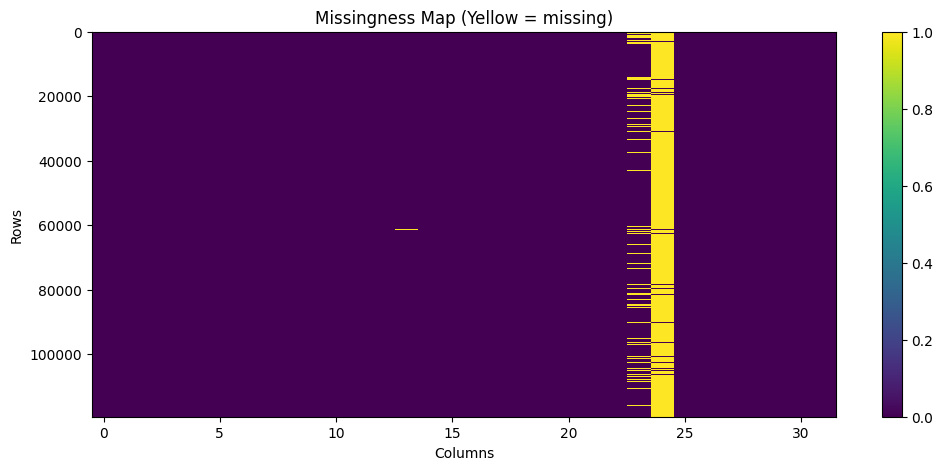

In [381]:
# Missingness heatmap
plt.figure(figsize=(12,5))
plt.imshow(df.isna(), aspect='auto', interpolation='nearest')
plt.title('Missingness Map (Yellow = missing)')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.colorbar()
plt.show()

### 3.1 Outlier Detection

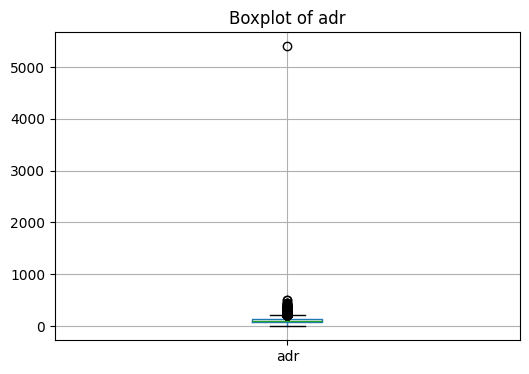

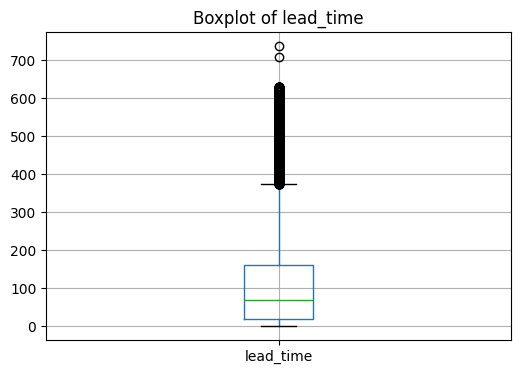

adr: 3793 outliers
lead_time: 3005 outliers


In [382]:
# This shows median, quartiles, and outliers as dots.
for col in ['adr','lead_time']:
    plt.figure(figsize=(6,4))
    df.boxplot(column=col)
    plt.title(f'Boxplot of {col}')
    plt.show()

# IQR method to detect outliers
for col in ['adr','lead_time']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    outliers = ((df[col] < lower) | (df[col] > upper)).sum()
    print(f'{col}: {outliers} outliers')

## 4) Data Cleaning

In [383]:
# Drop duplicates
df = df.drop_duplicates()

# Agent & company filled with None
for col in ['agent', 'company']:
    df.loc[:, col] = df[col].fillna(0)

# Country filled with Unknown
if 'country' in df.columns:
    df.loc[:, 'country'] = df['country'].fillna("Unknown")

# Children filled with median
if 'children' in df.columns:
    df.loc[:, 'children'] = df['children'].fillna(df['children'].median())

# Cap extreme adr values
if 'adr' in df.columns:
    df.loc[df['adr'] > 1000, 'adr'] = 1000

print('Missing values handled, duplicates dropped, adr capped')

Missing values handled, duplicates dropped, adr capped


### 4.1 Fix Data Types (Dates)

In [384]:
# Combine arrival_date_year, month, day into one datetime
month_map = {m:i for i,m in enumerate(['January','February','March','April','May','June',
                                       'July','August','September','October','November','December'],1)}
df['arrival_date_month_num'] = df['arrival_date_month'].map(month_map)
df['arrival_date'] = pd.to_datetime(dict(year=df['arrival_date_year'],
                                         month=df['arrival_date_month_num'],
                                         day=df['arrival_date_day_of_month']))

print(df[['arrival_date_year','arrival_date_month','arrival_date_day_of_month','arrival_date']].head(15))

    arrival_date_year arrival_date_month  arrival_date_day_of_month arrival_date
0                2015               July                          1   2015-07-01
1                2015               July                          1   2015-07-01
2                2015               July                          1   2015-07-01
3                2015               July                          1   2015-07-01
4                2015               July                          1   2015-07-01
6                2015               July                          1   2015-07-01
7                2015               July                          1   2015-07-01
8                2015               July                          1   2015-07-01
9                2015               July                          1   2015-07-01
10               2015               July                          1   2015-07-01
11               2015               July                          1   2015-07-01
12               2015       

## 5) Making my own features

In [385]:
# total_guests = adults + children + babies
df['total_guests'] = df['adults'] + df['children'] + df['babies']

# total_nights = stays_in_weekend_nights + stays_in_week_nights
df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

# is_family
df['is_family'] = np.where((df['children'] > 0) | (df['babies'] > 0), 1, 0)

# Date / Time Features
df['arrival_month'] = df['arrival_date'].dt.month
df['arrival_dayofweek'] = df['arrival_date'].dt.dayofweek

# Stay duration category
df['stay_duration_cat'] = pd.cut(df['total_nights'],
                                 bins=[0,3,7,14,100],
                                 labels=['short','medium','long','extended'])
# Guest-related
df['is_single_guest'] = (df['total_guests'] == 1).astype(int)
df['has_children'] = (df['children'] > 0).astype(int)

# Price-related
df['adr_per_person'] = df['adr'] / df['total_guests'].replace(0,1)
df['high_lead_time'] = (df['lead_time'] > 180).astype(int)

# Booking behavior
df['booking_changed'] = (df['booking_changes'] > 0).astype(int)
df['is_repeated_guest'] = (df['is_repeated_guest'] == 1).astype(int)
df['has_deposit'] = (df['deposit_type'] != 'No Deposit').astype(int)

print('Features created: total_guests, total_nights, is_family, date/time, stay_duration, Guest_related, price, is_repeated_guest')

print(' Additional features created')


Features created: total_guests, total_nights, is_family, date/time, stay_duration, Guest_related, price, is_repeated_guest
 Additional features created


## 6) Remove Data Leakage Columns

In [386]:
# Drop reservation status columns
leakage_cols = ['reservation_status','reservation_status_date']
df = df.drop(columns=leakage_cols, errors='ignore')
print('Dropped leakage columns (reservation_status, reservation_status_date)')

Dropped leakage columns (reservation_status, reservation_status_date)


## 7) Encode Categorical Variables

In [387]:
# Separate categorical and numeric columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Drop leakage columns if they exist (already handled earlier, but double safe)
for col in ['reservation_status', 'reservation_status_date']:
    if col in categorical_cols:
        categorical_cols.remove(col)

# Split into low- and high-cardinality categorical features
low_card_cols = [col for col in categorical_cols if df[col].nunique() <= 20]
high_card_cols = [col for col in categorical_cols if df[col].nunique() > 20]

print("Low-cardinality categorical columns:", low_card_cols)
print("High-cardinality categorical columns:", high_card_cols)

# --- One-Hot Encode Low-Cardinality ---
if low_card_cols:
    df = pd.get_dummies(df, columns=low_card_cols, drop_first=True)

# --- Frequency Encode High-Cardinality ---
for col in high_card_cols:
    freq_map = df[col].value_counts(normalize=True)  # relative frequency
    df[col] = df[col].map(freq_map)

print("Encoding complete")

Low-cardinality categorical columns: ['hotel', 'arrival_date_month', 'meal', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type']
High-cardinality categorical columns: ['country']
Encoding complete


## 8) Adding More Visualization: (For clarity)

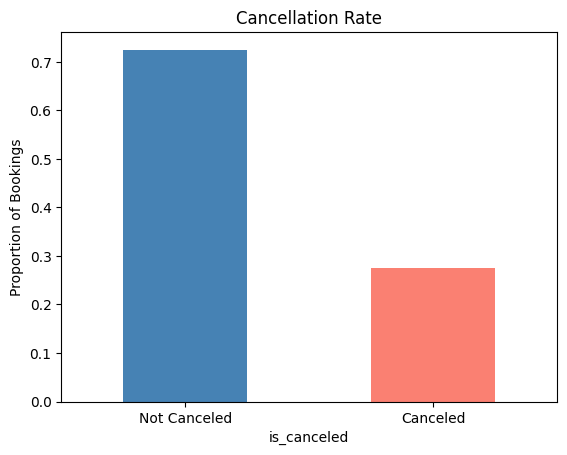

In [388]:
# Bar chart of cancellation vs non-cancellation
# is_canceled = 0 (not canceled), 1 (canceled)

df['is_canceled'].value_counts(normalize=True).plot(kind='bar', color=['steelblue','salmon'])
plt.title('Cancellation Rate')
plt.xticks([0,1], ['Not Canceled','Canceled'], rotation=0)
plt.ylabel('Proportion of Bookings')
plt.show()

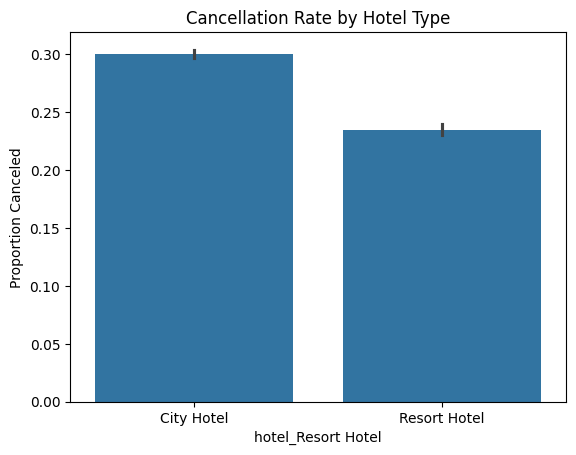

In [389]:
# Barplot showing cancellation rate per hotel type (City vs Resort)

sns.barplot(data=df, x='hotel_Resort Hotel', y='is_canceled', estimator=lambda x: sum(x)/len(x))
plt.title('Cancellation Rate by Hotel Type')
plt.xticks([0, 1], ['City Hotel', 'Resort Hotel'])
plt.ylabel('Proportion Canceled')
plt.show()

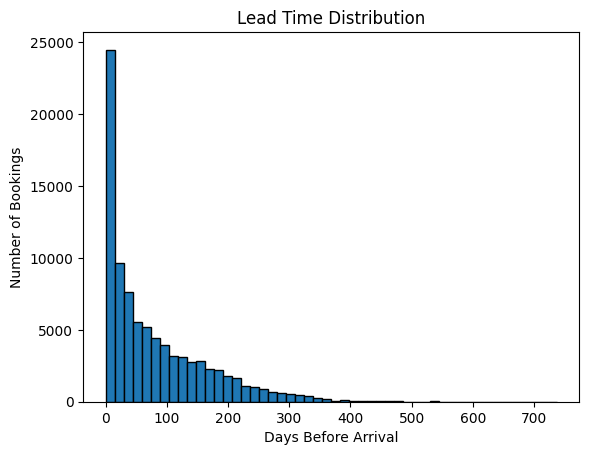

In [390]:
# Days before arrival the booking was made

plt.hist(df['lead_time'], bins=50, edgecolor='k')
plt.title('Lead Time Distribution')
plt.xlabel('Days Before Arrival')
plt.ylabel('Number of Bookings')
plt.show()

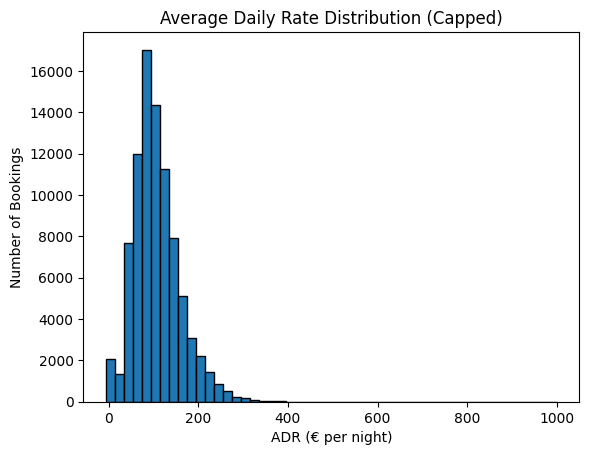

In [391]:
# ADR (room price per night), after capping outliers

plt.hist(df['adr'], bins=50, edgecolor='k')
plt.title('Average Daily Rate Distribution (Capped)')
plt.xlabel('ADR (€ per night)')
plt.ylabel('Number of Bookings')
plt.show()

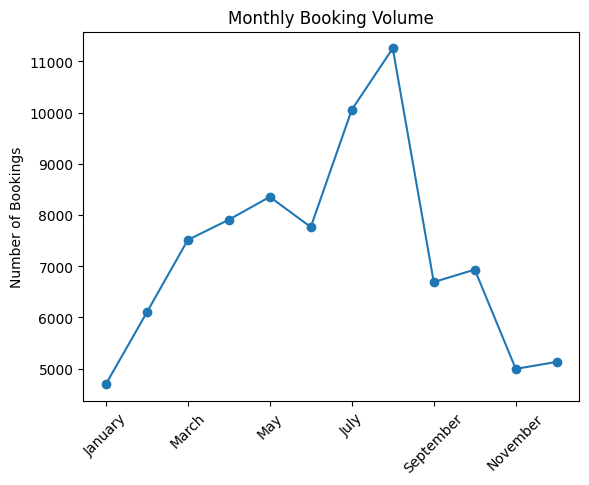

In [392]:
# Monthly Booking Patterns

monthly_counts = df.groupby(df['arrival_date'].dt.month, observed=False).size()
monthly_counts = monthly_counts.sort_index() # Sort by month number
monthly_counts.index = ['January','February','March','April','May','June',
                        'July','August','September','October','November','December']
monthly_counts.plot(kind='line', marker='o')
plt.title('Monthly Booking Volume')
plt.xticks(rotation=45)
plt.ylabel('Number of Bookings')
plt.show()

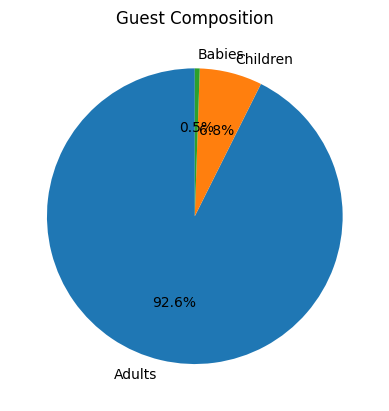

In [393]:
# Pie chart showing the composition of guests: adults, children, babies

guest_totals = {
    'Adults': df['adults'].sum(),
    'Children': df['children'].sum(),
    'Babies': df['babies'].sum()
}

plt.pie(guest_totals.values(), labels=guest_totals.keys(), autopct='%1.1f%%', startangle=90)
plt.title('Guest Composition')
plt.show()


## 9) Final Preparation: Train/Test Split

In [394]:
# Define features and target
target = 'is_canceled'
X = df.drop(columns=[target])
y = df[target]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print('Train shape:', X_train.shape, 'Test shape:', X_test.shape)

Train shape: (69916, 86) Test shape: (17480, 86)
